In [21]:
cs_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "youre": 'you are',
    " u ": ' you ',
    ' ur ': ' your ',
    'm8': 'mate',
    'smb':'somebody',
    'smth': 'something',
    'smh': 'somehow',
    ' ü ': ' you ',
    ' lt ': 'love that',
    ' gt ': 'get through',
    'cant': 'cannot'
    }

In [2]:
import pandas as pd
import numpy as np
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import transformers

In [3]:
# >>> from transformers import BertTokenizer, BertForPreTraining
# >>> import torch

# >>> tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# >>> model = BertForPreTraining.from_pretrained('bert-base-uncased')

# >>> inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
# >>> outputs = model(**inputs)

# >>> prediction_logits = outputs.prediction_logits
# >>> seq_relationship_logits = outputs.seq_relationship_logits

In [4]:
# inputs

In [5]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# f = open('smsspamcollection\SMSSpamCollection.txt', 'r', encoding='UTF-8')
# lines = []
# for line in f:
#     lines.append(line[:-1].split('\t'))

In [7]:
# data = pd.DataFrame(lines, columns=['class', 'text'])

In [8]:
data = pd.read_csv('20newsgroup.csv', index_col=0)

In [9]:
data['text']

0        I am sure some bashers of Pens fans are pretty...
1        My brother is in the market for a high-perform...
2        |>Greater Armenia would stretch from Karabakh,...
3        > >>     Can anyone explain in fairly simple t...
4        1)    I have an old Jasmine drive which I cann...
                               ...                        
18841    DN> DN> A neurology\nDN> consultation is cheap...
18842    >\n>I thought the ground WAS connected to the ...
18843    I just installed a DX2-66 CPU in a clone mothe...
18844    >\n>Given 4 points (non coplanar), how does on...
18845    After a tip from Gary Crum (crum@fcom.cc.utah....
Name: text, Length: 18846, dtype: object

In [52]:
data['text'] = data['text'].apply(str)

In [11]:
data['text']

0        I am sure some bashers of Pens fans are pretty...
1        My brother is in the market for a high-perform...
2        |>Greater Armenia would stretch from Karabakh,...
3        > >>     Can anyone explain in fairly simple t...
4        1)    I have an old Jasmine drive which I cann...
                               ...                        
18841    DN> DN> A neurology\nDN> consultation is cheap...
18842    >\n>I thought the ground WAS connected to the ...
18843    I just installed a DX2-66 CPU in a clone mothe...
18844    >\n>Given 4 points (non coplanar), how does on...
18845    After a tip from Gary Crum (crum@fcom.cc.utah....
Name: text, Length: 18846, dtype: object

## Гистограмма длин текстов

In [12]:
data = data[data['text'].apply(len) < 20000]

(array([7.096e+03, 6.068e+03, 2.565e+03, 1.141e+03, 5.550e+02, 3.610e+02,
        2.430e+02, 1.680e+02, 1.020e+02, 7.200e+01, 5.900e+01, 4.200e+01,
        5.200e+01, 3.400e+01, 2.800e+01, 2.800e+01, 2.200e+01, 2.000e+01,
        6.000e+00, 1.100e+01, 7.000e+00, 1.100e+01, 7.000e+00, 1.000e+01,
        4.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 8.000e+00, 4.000e+00]),
 array([3.00000e+00, 6.59400e+02, 1.31580e+03, 1.97220e+03, 2.62860e+03,
        3.28500e+03, 3.94140e+03, 4.59780e+03, 5.25420e+03, 5.91060e+03,
        6.56700e+03, 7.22340e+03, 7.87980e+03, 8.53620e+03, 9.19260e+03,
        9.84900e+03, 1.05054e+04, 1.11618e+04, 1.18182e+04, 1.24746e+04,
        1.31310e+04, 1.37874e+04, 1.44438e+04, 1.51002e+04, 1.57566e+04,
        1.64130e+04, 1.70694e+04, 1.77258e+04, 1.83822e+04, 1.90386e+04,
        1.96950e+04]),
 <BarContainer object of 30 artists>)

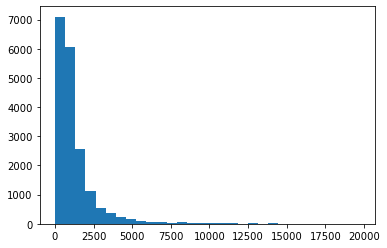

In [13]:
plt.hist(data['text'].apply(len), bins = 30)

In [14]:
def expand_match(contraction):
    match = contraction.group(0)
    expanded_contraction = cs_dict.get(match) if cs_dict.get(match) else cs_dict.get(match.lower())
    return expanded_contraction


def expand_contractions(text, cs_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(cs_dict.keys())), flags=re.IGNORECASE | re.DOTALL)


    expanded_text = contractions_pattern.sub(expand_match, text)

    return expanded_text

In [15]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

## Preprocessing

In [16]:
import string
def text_prep(text):
    new_text = text.lower()
    new_text = expand_contractions(new_text, cs_dict)
    no_punc = [c for c in new_text if c not in string.punctuation]
    no_punc =''.join(no_punc)
    
    cleaned_text = [word for word in no_punc.split() if word not in stopwords.words('english') and not word.isnumeric()]
    
    lemma_words = [lemmatizer.lemmatize(word) for word in cleaned_text if len(word) > 2]
#     lemma_words = [word for word in cleaned_text if len(word) > 2]
    return lemma_words


In [17]:
data = data.drop_duplicates()

In [53]:
data['lemma_text'] = data['text'].apply(text_prep)

In [55]:
data['lemma_text'].apply(lambda x: ' '.join(x)).to_csv('data.csv')
# data.to_csv('data.csv')

In [33]:
# data = pd.read_csv('data.csv', index_col=0)

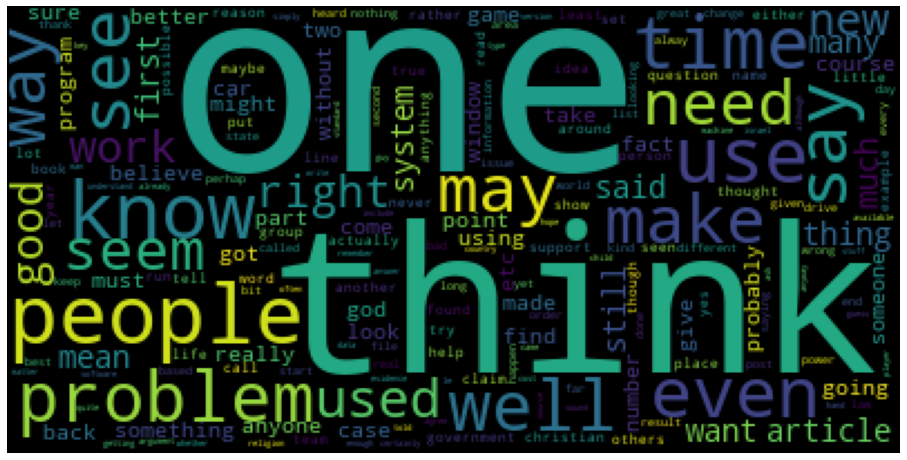

In [57]:
wcloud = ' '.join(data['lemma_text'].apply(lambda x: ' '.join(x)))
wordcloud = WordCloud().generate(wcloud)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

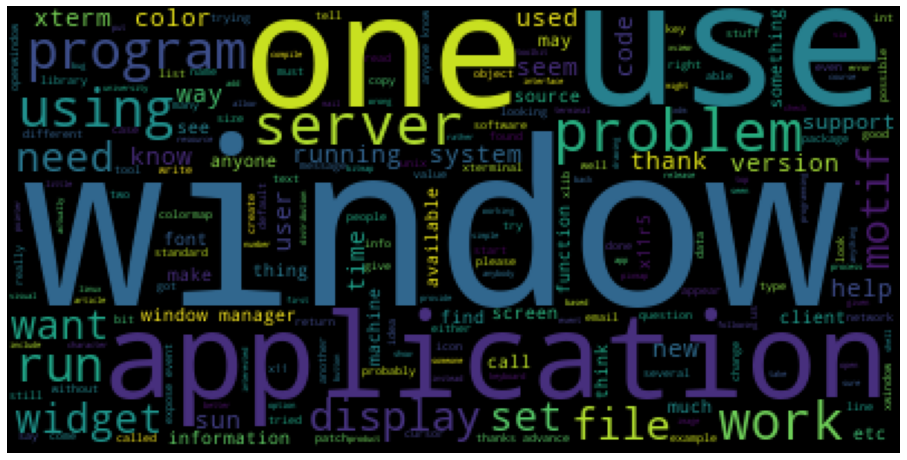

In [58]:
wcloud = ' '.join(data[data['class']==5]['lemma_text'].apply(lambda x: ' '.join(x)))
wordcloud = WordCloud().generate(wcloud)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Stopwords попадают в выборку и появляются часто, потому что являеются сокращениями 

TODO:
Расширить список стоп слов или заменить сокращения на полную версию слова (done)

Попробовать различные векторизации и сравнить результаты работы моделей на данных
- Doc2vec
- TFIDF
- Word2vec/TFIDF


## Vectorizing

### TFIDF


In [62]:
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.cluster import KMeans

In [59]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=2000)
data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
data_vectors.columns=vectorizer.get_feature_names()
most_common_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=100)
most_common = pd.DataFrame(most_common_vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
most_common.columns=most_common_vectorizer.get_feature_names()


In [60]:
exp_data = data_vectors.drop(most_common.columns, axis=1)

In [63]:
cluster_model = KMeans(n_clusters=20, random_state=13)
cluster_model.fit(exp_data)
print(v_measure_score(data['class'], cluster_model.labels_))

0.3861949024243274


In [64]:
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.cluster import KMeans
#Размер вектора был выбран из интервала [400, 2600]
for i in range(2000, 2001, 200):
    for j in range(1, 4):
        vectorizer = TfidfVectorizer(ngram_range=(1, j), max_features=i)
        data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
        data_vectors.columns=vectorizer.get_feature_names()
        cluster_model = KMeans(n_clusters=20, random_state=13)
        cluster_model.fit(data_vectors)
        print('max_f = ', i,' n_grams = ', j, v_measure_score(data['class'], cluster_model.labels_))
   


max_f =  2000  n_grams =  1 0.3994382645500334
max_f =  2000  n_grams =  2 0.4043357624888744
max_f =  2000  n_grams =  3 0.4043683103617186


In [65]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=2000)
data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
data_vectors.columns=vectorizer.get_feature_names()
cluster_model = KMeans(n_clusters=20, random_state=13)
cluster_model.fit(data_vectors)
print('max_f = ', i,' n_grams = ', j, v_measure_score(data['class'], cluster_model.labels_))

max_f =  2000  n_grams =  3 0.4043357624888744


<AxesSubplot:xlabel='x', ylabel='y'>

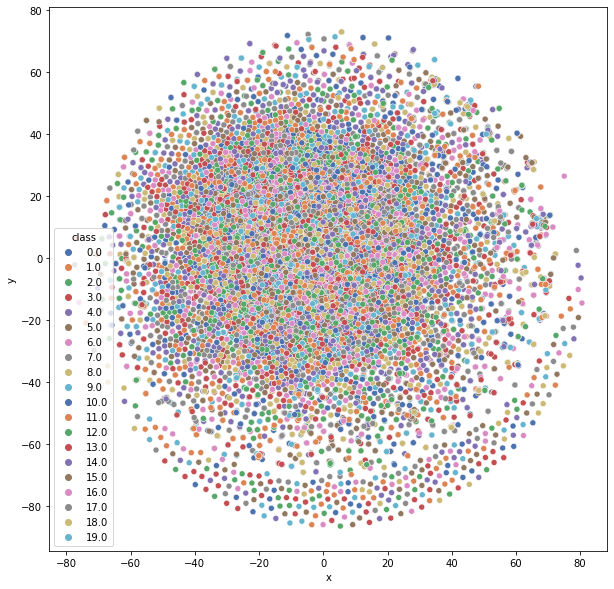

In [66]:
from sklearn.manifold import TSNE


data_embedded = TSNE(n_components=2).fit_transform(data_vectors)
tsne = pd.DataFrame(data_embedded, columns=['x', 'y'])
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne, x='x', y='y', hue=data['class'], palette="deep")

### Doc2Vec

In [67]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data['lemma_text'])]

In [68]:
len(documents)

18729

In [69]:
v_measures = {}
# vectorsize was tested from 300 up to 3000
model = Doc2Vec(documents, vector_size=1600, random_state=13)
#     break
 

In [70]:
doc2vec_data_vectors=data['lemma_text'].apply(model.infer_vector)

In [71]:
docs = list()
for i in doc2vec_data_vectors.to_numpy():
    docs.append(list(i))

In [72]:
v_measures = {}
for i in range(500,3001, 500):
    model = Doc2Vec(documents, vector_size=i, random_state=13)
    doc2vec_data_vectors=data['lemma_text'].apply(model.infer_vector)
    docs = list()
    for j in doc2vec_data_vectors.to_numpy():
        docs.append(list(j))
    cluster_model = KMeans(n_clusters=20, random_state=13)
    cluster_model.fit(docs)
    v_measures[i] = v_measure_score(data['class'], cluster_model.labels_)
    print('vector_size = ', i, v_measure_score(data['class'], cluster_model.labels_))

vector_size =  500 0.2672782376397442
vector_size =  1000 0.23372722548878233
vector_size =  1500 0.25539043305350845
vector_size =  2000 0.2362750858489539
vector_size =  2500 0.26314740255173025
vector_size =  3000 0.24908454875257613


In [73]:
model = Doc2Vec(documents, vector_size=500, random_state=13)
doc2vec_data_vectors=data['lemma_text'].apply(model.infer_vector)

### Word2Vec + TFIDF

In [74]:
import gensim
text_model=gensim.models.Word2Vec(data['lemma_text'], size=4, min_count=10)

In [75]:
text_model.save('text_model.bin')

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=2000)
data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
data_vectors.columns=vectorizer.get_feature_names()

In [77]:
data_vectors

,1st,2nd,3rd,ability,able,absolute,absolutely,abuse,accept,acceptable,...,wrote,yeah,year,yes,yesterday,yet,york,young,zero,zone
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.057179,0.0,0.0,0.037365,0.048796,0.0,0.0,0.0
3,0.0,0.0,0.0,0.038047,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18724,0.0,0.0,0.0,0.000000,0.069709,0.0,0.095729,0.0,0.0,0.0,...,0.0,0.0,0.053984,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
18725,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
18726,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.075039,0.000000,0.0,0.0,0.0
18727,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [79]:
tmp = text_model['1st']
new_data=pd.DataFrame(np.dot(np.array(data_vectors['1st']).reshape(18729, 1) , tmp.reshape(1, 4) ))

In [80]:
for col in data_vectors.columns[1:]:
    tmp = text_model[col]
    tmp_data=pd.DataFrame(np.dot(np.array(data_vectors[col]).reshape(18729, 1) , tmp.reshape(1, 4) ))
    new_data = new_data.join(tmp_data,  rsuffix='_'+col)

In [81]:
from sklearn.cluster import KMeans

In [82]:
cluster_model = KMeans(n_clusters=20, random_state=13)
cluster_model.fit(new_data)

KMeans(n_clusters=20, random_state=13)

In [83]:
from sklearn.metrics import silhouette_score, v_measure_score

print('Kmeans, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('Kmeans, silhouette_score', silhouette_score(new_data, cluster_model.labels_))


Kmeans, v measure 0.30468514945786734
Kmeans, silhouette_score -0.01905834257988344


In [84]:
word2vec_vectors = new_data

## Word2Vec  Pretrained vectors

In [85]:
from gensim.models import Word2Vec, KeyedVectors

In [86]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,)

In [87]:
data.text[0]

"I am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [88]:
documents[0]

TaggedDocument(words=['sure', 'bashers', 'pen', 'fan', 'pretty', 'confused', 'lack', 'kind', 'post', 'recent', 'pen', 'massacre', 'devil', 'actually', 'bit', 'puzzled', 'bit', 'relieved', 'however', 'going', 'put', 'end', 'nonpittsburghers', 'relief', 'bit', 'praise', 'pen', 'man', 'killing', 'devil', 'worse', 'thought', 'jagr', 'showed', 'much', 'better', 'regular', 'season', 'stats', 'also', 'lot', 'fun', 'watch', 'playoff', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'game', 'since', 'pen', 'going', 'beat', 'pulp', 'jersey', 'anyway', 'disappointed', 'see', 'islander', 'lose', 'final', 'regular', 'season', 'game', 'pen', 'rule'], tags=[0])

In [89]:
WV = []
for doc in data['lemma_text']:
    new = np.zeros(300)
    for word in doc:
        try:
            vector = model[word]
            new += vector
        except:
            pass
    WV.append(new)

In [93]:
WV[0]

array([  5.3890686 ,   3.23510742,  -1.71482086,   4.68237305,
        -1.92810059,   1.44677734,   2.4289093 ,  -5.30960083,
         7.94772339,   7.51995087,   0.97747803,  -9.7878418 ,
        -1.76205063,  -1.15460205,  -7.38336182,   2.52368164,
         5.22351074,   7.23657227,   1.82592773,  -6.93460083,
         2.31035995,   4.31419373,   4.79240799,  -2.55300903,
         1.66923523,  -3.6331501 ,  -3.42379761,   1.44165421,
         2.90959167,   3.2563324 ,  -2.58496094,   4.94628906,
         0.72060394,   0.89567947,   1.68577576,   2.50851345,
         5.06787109,   0.89717484,   3.87862539,   8.91638184,
         7.94702148,  -7.57263184,  11.5960083 ,   1.40922928,
        -0.29016876,  -2.35049438,  -2.45239151,  -0.15252686,
         3.70054626,   2.8152771 ,  -3.47698975,   3.42487335,
        -1.51858521,  -4.51860046,   0.14871216,  -1.44024658,
        -1.30300903,  -5.18292809,   5.46954346,  -8.00085449,
        -3.29753876,   4.02671814,  -3.54112244,  -4.75

In [91]:
WV = np.array(WV)
cluster_model = KMeans(n_clusters=20, random_state=13)
#TFIDF data
cluster_model.fit(WV)
print('Kmeans, v measure', v_measure_score(data['class'], cluster_model.labels_))

Kmeans, v measure 0.09539469707975846


In [92]:
WV_TFIDF = data_vectors.join(pd.DataFrame(WV))
cluster_model = KMeans(n_clusters=20, random_state=13)
#TFIDF data
cluster_model.fit(WV_TFIDF)
print('Kmeans, v measure', v_measure_score(data['class'], cluster_model.labels_))


Kmeans, v measure 0.10987222988668374


## Kmeans

In [ ]:
cluster_model = KMeans(n_clusters=20, random_state=13)
#TFIDF data
cluster_model.fit(data_vectors)
print('Kmeans, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('Kmeans, silhouette_score', silhouette_score(data_vectors, cluster_model.labels_))                  

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.title('Real clusters')
sns.scatterplot(data=tsne, x='x', y='y', hue=data['class'], palette="deep")

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.title('Predicted clusters')
sns.scatterplot(data=tsne, x='x', y='y', hue=cluster_model.labels_, palette="deep")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params ={'max_iter': range(100, 500, 50),
'tol': [1e-4, 1e-3, 1e-2]}

clst = GridSearchCV(cluster_model, params)

In [ ]:
clst.fit(data_vectors)

In [ ]:
clst.best_params_

In [ ]:
print('Kmeans, v measure', v_measure_score(data['class'], clst.estimator.labels_))
print('Kmeans, silhouette_score', silhouette_score(data_vectors, clst.estimator.labels_))

## Evaluating number of clusters

In [204]:
pip install clusteval

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=249567c114dc54d5e11f987fc6db94fd95115773c708f09d4ce7cda795168513
  Stored in directory: c:\users\evgenii_kozlov2\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn



In [205]:
from clusteval import clusteval

ce = clusteval(method='silhouette')
results= ce.fit(np.array(data_vectors))


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward


  0%|                                                                                               | 0/23 [00:00<?, ?it/s]

[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████████| 23/23 [05:45<00:00, 15.01s/it]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


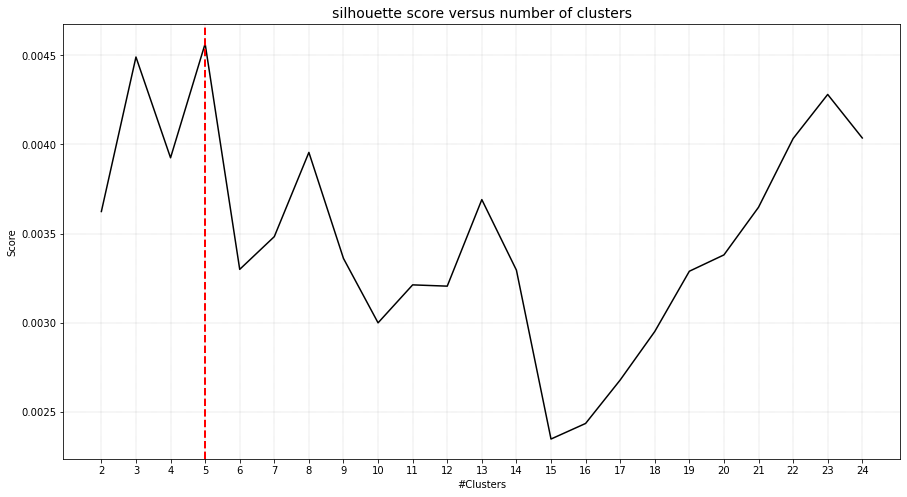

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'silhouette score versus number of clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [206]:
ce.plot()

## MiniBatch KMeans

Оптимальное количество кластеров через метод силуэта: 20

In [207]:
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans

In [210]:
cluster_model = MiniBatchKMeans(n_clusters=20, random_state=13)
cluster_model.fit(data_vectors)
print('Mini Batch, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('Mini Batch, silhouette_score', silhouette_score(data_vectors, cluster_model.labels_))

Mini Batch, v measure 0.34933717458275915
Mini Batch, silhouette_score -0.0030303601107586494


<AxesSubplot:xlabel='x', ylabel='y'>

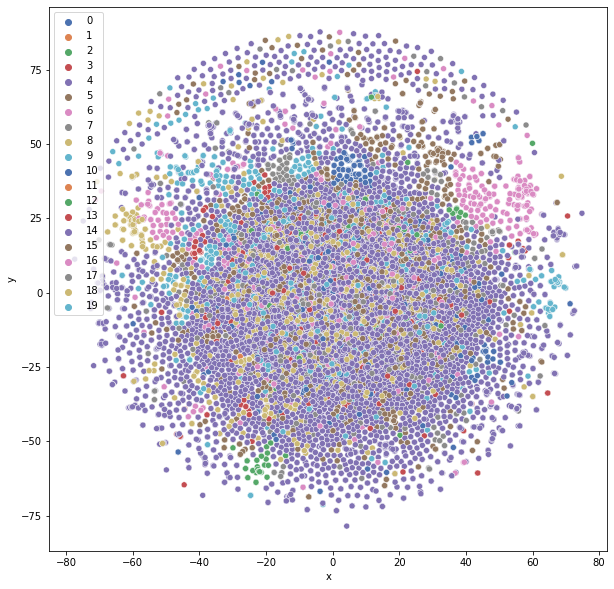

In [211]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne, x='x', y='y', hue=cluster_model.labels_, palette="deep")

In [213]:
params ={'max_iter': range(100, 501, 100),
'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e1],
'batch_size': range(100, 1001, 100)}

clst = GridSearchCV(cluster_model, params)
clst.fit(data_vectors)
clst.best_params_

{'batch_size': 1000, 'max_iter': 100, 'tol': 1e-05}

In [214]:
print('Kmeans, v measure', v_measure_score(data['class'], clst.estimator.labels_))
print('Kmeans, silhouette_score', silhouette_score(data_vectors, clst.estimator.labels_))

Kmeans, v measure 0.34933717458275915
Kmeans, silhouette_score -0.0030303601107586494


<AxesSubplot:xlabel='x', ylabel='y'>

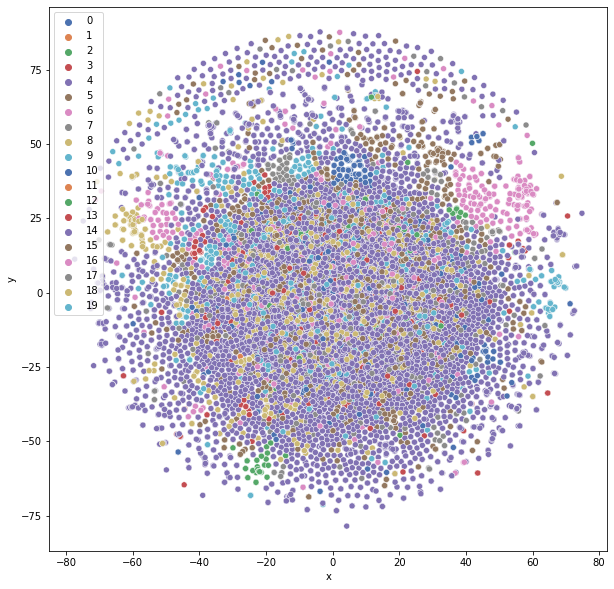

In [215]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne, x='x', y='y', hue=clst.estimator.labels_, palette="deep")

## AgglomerativeClustering

In [216]:
cluster_model = AgglomerativeClustering(n_clusters=20)
cluster_model.fit(data_vectors)
print('AC, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('AC, silhouette_score', silhouette_score(data_vectors, cluster_model.labels_))

AC, v measure 0.318179814574723
AC, silhouette_score 0.003380926847089864


<AxesSubplot:title={'center':'Real clusters'}, xlabel='x', ylabel='y'>

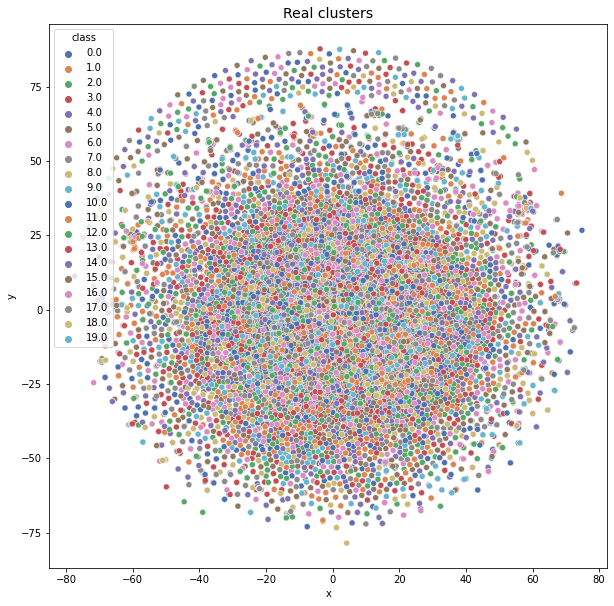

In [217]:
fig = plt.figure(figsize=(10,10))
plt.title('Real clusters')
sns.scatterplot(data=tsne, x='x', y='y', hue=data['class'], palette="deep")

<AxesSubplot:title={'center':'Model clusters'}, xlabel='x', ylabel='y'>

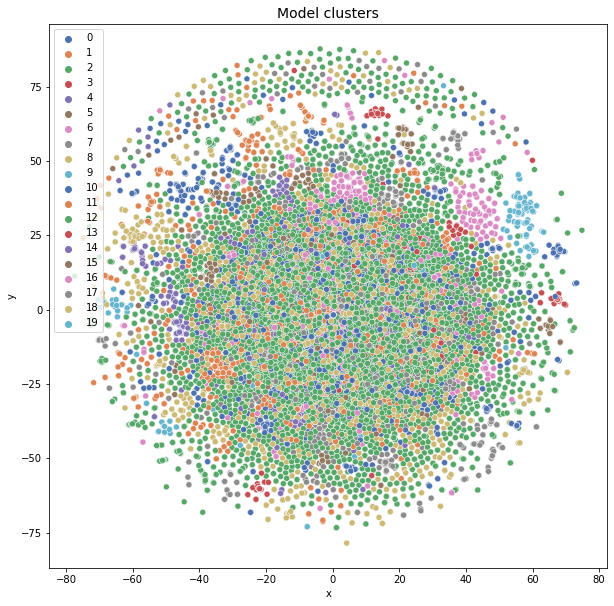

In [218]:
fig = plt.figure(figsize=(10,10))
plt.title('Model clusters')
sns.scatterplot(data=tsne, x='x', y='y', hue=cluster_model.labels_, palette="deep")

## DBSCAN

In [86]:
# Чтобы ускорить процесс были выбранны данные меньшего объема, только для демонстрации работы алгоритма
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=600)
data_vectors = pd.DataFrame(vectorizer.fit_transform(data['lemma_text'].apply(lambda x: ' '. join(x))).toarray())
data_vectors.columns=vectorizer.get_feature_names()

In [87]:
from sklearn.cluster import DBSCAN

In [88]:
cluster_model = DBSCAN()
cluster_model.fit(data_vectors)
print('DBSCAN, v measure', v_measure_score(data['class'], cluster_model.labels_))
print('DBSCAN, silhouette_score', silhouette_score(data_vectors, cluster_model.labels_))

DBSCAN, v measure 0.010926648237354172
DBSCAN, silhouette_score -0.26390690053698285


### DBSCAN Hyperparametrs

#### For the TFIDF data

In [260]:
import numpy as np

In [261]:
data_vectors=data_vectors.sort_values(by=list(data_vectors.columns))

In [263]:
data_vectors

,1st,2nd,3rd,ability,able,absolute,absolutely,abuse,accept,acceptable,...,year,year ago,year old,yes,yesterday,yet,york,young,zero,zone
185,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
982,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0.842679,0.0,0.042858,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11102,0.848811,0.0,0.043170,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17150,0.849585,0.0,0.043209,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4696,0.854980,0.0,0.043483,0.0,0.0,0.0,0.0,0.0,0.035718,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
df2 = pd.DataFrame(columns = ['index', 'dist'])
for i in range(0, len(data_vectors)-1):
    dist = np.linalg.norm(data_vectors.iloc[i]-data_vectors.iloc[i+1])
    df2 = df2.append({'index':str(i), 'dist':dist}, ignore_index=True)

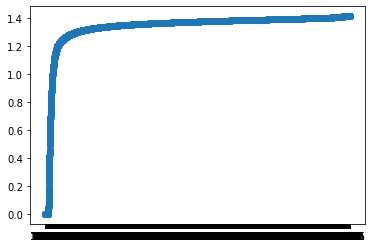

In [274]:
df2 =df2.sort_values(by='dist')
plt.scatter(df2['index'], df2['dist'])
plt.show()

In [ ]:
eps = [0.8, 0.9, 1]

for e in eps:
    print('eps', e)
    cluster_model = DBSCAN(eps = e, min_samples=5)
    cluster_model.fit(data_vectors)
    
    print('DBSCAN, v measure', v_measure_score(data.iloc[data_vectors.index]['class'], cluster_model.labels_))
    print('DBSCAN, silhouette_score', silhouette_score(data_vectors, cluster_model.labels_))

eps 0.8


#### DBSCAN on TFIDF data has negative silhouette score and insignificant v_measure

#### Doc2Vec data

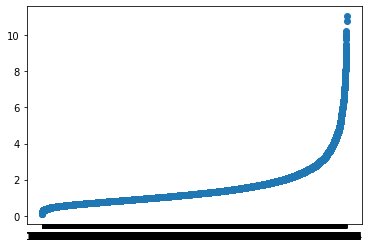

In [100]:
df2 = pd.DataFrame(columns = ['index', 'dist'])
for i in range(0, len(doc2vec_data_vectors)-1):
    dist = np.linalg.norm(doc2vec_data_vectors.iloc[i]-doc2vec_data_vectors.iloc[i+1])
    df2 = df2.append({'index':str(i), 'dist':dist}, ignore_index=True)
df2 =df2.sort_values(by='dist')
plt.scatter(df2['index'], df2['dist'])
plt.show()

In [101]:
doc2vec_data_vectors[0]

array([-1.29489809e-01, -4.81723715e-03, -2.36493908e-02,  6.01844452e-02,
        2.38265027e-03,  5.37112132e-02, -1.73339974e-02, -1.56340059e-02,
        3.74063365e-02, -4.66189981e-02,  6.75021410e-02, -2.63878386e-02,
       -6.46027476e-02,  2.90601123e-02, -3.07965260e-02, -5.31287864e-02,
       -3.48003358e-02, -3.13994698e-02, -4.76433821e-02, -5.96642718e-02,
       -3.26447152e-02, -8.98942500e-02,  3.04017961e-02, -1.85217857e-02,
       -9.58658475e-03, -9.95349046e-03, -2.04511383e-03,  7.02805966e-02,
        3.18110064e-02, -6.15529828e-02,  1.92769878e-02, -6.35287911e-02,
        7.13470355e-02, -8.05234257e-03,  2.62796413e-02, -3.41768228e-02,
       -6.01854846e-02, -9.30578336e-02, -1.20757578e-03, -1.13812396e-02,
        3.90005112e-02,  2.32434869e-02, -1.29458215e-02, -9.42582265e-02,
        6.93759620e-02,  3.96065861e-02,  3.91888805e-02, -4.12405245e-02,
       -4.18602973e-02,  5.26848882e-02, -8.24396964e-03, -5.96190579e-02,
       -7.13910609e-02,  

In [106]:
doc2vec_pd = pd.DataFrame(np.array(list(doc2vec_data_vectors)))

In [ ]:
#Doc2Vec data
from sklearn.cluster import DBSCAN

cluster_model = DBSCAN(eps = 0.9, min_samples=5)
cluster_model.fit(np.array(doc2vec_pd))
    
print('DBSCAN, v measure', v_measure_score(data.iloc[data_vectors.index]['class'], cluster_model.labels_))
print('DBSCAN, silhouette_score', silhouette_score(np.array(doc2vec_pd), cluster_model.labels_))

### Word2Vec data

In [ ]:
cluster_model = DBSCAN(eps = 0.5, min_samples=5)
cluster_model.fit(np.array(word2vec_vectors))
    
print('DBSCAN, v measure', v_measure_score(data.iloc[word2vec_vectors.index]['class'], cluster_model.labels_))
print('DBSCAN, silhouette_score', silhouette_score(word2vec_vectors cluster_model.labels_))

### HDBSCAN

In [ ]:
pip install hdbscan